# Project6-Movie Popularity and Rating Trends Analysis

## <font color=orange> Outline
1. Data Cleaning: Preprocess the data to handle missing values, outliers, and duplicates. 
2. Movie Rating Analysis: Analyze the average ratings (vote_average) and identify the 
highest and lowest rated movies. 
3. Popularity Analysis: Study the relationship between movie popularity (popularity) 
and ratings, as well as the number of votes (vote_count). 
4. Genre Analysis: Use genre data (genre_ids) to analyze the ratings and popularity of 
different movie genres. 
5. Temporal Analysis: Explore trends in movie ratings and popularity across different 
release years. 
6. Data Visualization: Visualize the distribution, ratings, and popularity of movies using 
charts and graphs. 
7. Recommendation System Basics: Attempt to recommend movies to users using a 
simple algorithm. 

## <font color=orange> Requirements: 
1. Use Python for data processing and analysis. 
2. Employ the Pandas library for data manipulation. 
3. Use Matplotlib, Seaborn, or Plotly for data visualization. 
4. Document the analysis process and results in a Jupyter Notebook. 
5. Submit a report that includes code, analysis results, and visualizations.

## <font color=orange> Task1:Data Cleaning
### <font color=red> Code 01

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
import ast

# 1.Load the data
df = pd.read_csv('top_rated_9000_movies_on_TMDB.csv')

# 2.Clean the data
# Check for missing values
print(df.isnull().sum())

# Delete missing values
df = df.dropna()

# Check duplicate value
df = df.drop_duplicates()

id                   0
title                0
original_language    0
release_date         0
vote_average         0
vote_count           0
popularity           0
overview             0
genre_ids            0
Genres               0
dtype: int64


### <font color=blue> Analysis 01
#### In this step, we read the data in the file and check the integrity of the file and the uniqueness of the data.



## <font color=orange> Task2:Movie Rating Analysis
### <font color=red> Code 02

In [2]:
# Analyze average ratings
highest_rated = df[df['vote_average'] == df['vote_average'].max()]
lowest_rated = df[df['vote_average'] == df['vote_average'].min()]
print(highest_rated)
print(lowest_rated)

    id                     title original_language release_date  vote_average  \
0  278  The Shawshank Redemption                en   1994-09-23         8.706   

   vote_count  popularity                                           overview  \
0       26840     150.307  Imprisoned in the 1940s for the double murder ...   

  genre_ids              Genres  
0  [18, 80]  ['Drama', 'Crime']  
         id                       title original_language release_date  \
9629  40016  Birdemic: Shock and Terror                en   2010-02-27   

      vote_average  vote_count  popularity  \
9629           2.2         331       6.548   

                                               overview        genre_ids  \
9629  A platoon of eagles and vultures attacks the r...  [10749, 27, 53]   

                                 Genres  
9629  ['Romance', 'Horror', 'Thriller']  


### <font color=blue> Analysis 02
#### In this step, we found the two movies in the data with the highest and lowest median values in the <font color=red> "vote_average" </font> category.




## <font color=orange> Task3:Popularity Analysis
### <font color=red> Code 03

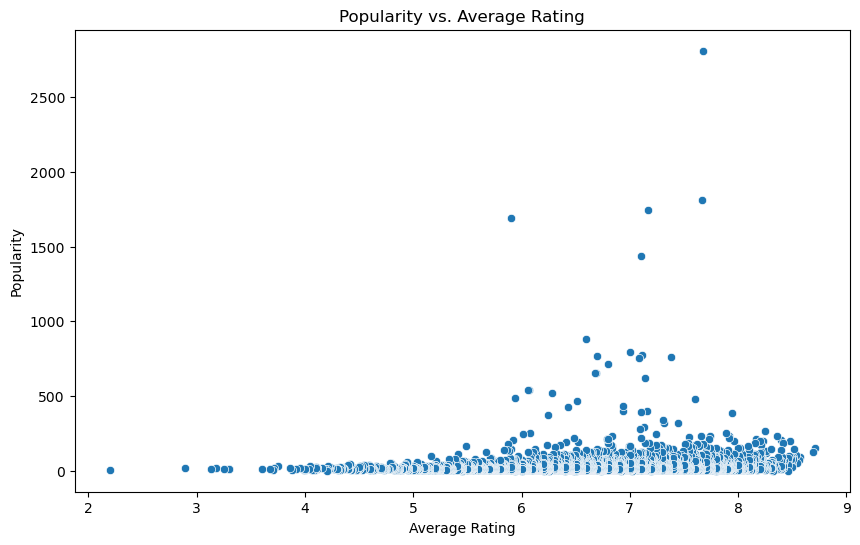

In [3]:
# Relationship between popularity and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vote_average', y='popularity')
plt.title('Popularity vs. Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.show()

### <font color=blue> Analysis 03
#### In this step, we use both <font color=red> "popularity" </font> and <font color=red> "average vote" </font> data to create a chart that more clearly shows the conclusion that <font color=purple> "the higher the" average vote "of the film, the higher the general" popularity " </font> .




## <font color=orange> Task4:Genre Analysis
### <font color=red> Code 04

In [4]:
# Analyze ratings and popularity by genre
genre_ratings = df.explode('genre_ids').groupby('genre_ids')['vote_average'].mean()
genre_popularity = df.explode('genre_ids').groupby('genre_ids')['popularity'].mean()
genre_merge_df = pd.merge(genre_ratings, genre_popularity, on='genre_ids', how='left')

# Print the results
print(genre_ratings)
print(genre_popularity)
print(genre_merge_df)

genre_ids
[10402, 10749, 18]                    6.583333
[10402, 10749, 35]                    7.000000
[10402, 10751, 18]                    5.504000
[10402, 14, 35, 878, 10751, 10770]    7.400000
[10402, 16, 10751, 14]                7.104000
                                        ...   
[9648, 80, 18]                        6.343000
[9648, 80, 53]                        6.849444
[9648, 878, 53]                       5.803800
[9648, 878]                           6.970000
[9648]                                6.837000
Name: vote_average, Length: 2045, dtype: float64
genre_ids
[10402, 10749, 18]                     9.739333
[10402, 10749, 35]                     8.852000
[10402, 10751, 18]                     8.256000
[10402, 14, 35, 878, 10751, 10770]    24.786000
[10402, 16, 10751, 14]                17.846000
                                        ...    
[9648, 80, 18]                        12.094000
[9648, 80, 53]                        14.863778
[9648, 878, 53]               

### <font color=blue> Analysis 04
#### In this step, we merged the same movies by genre and calculated their average rating and popularity. We then merge the new dataframe based on <font color=red> "genre_ids"</font>.



### <font color=red> Code 05

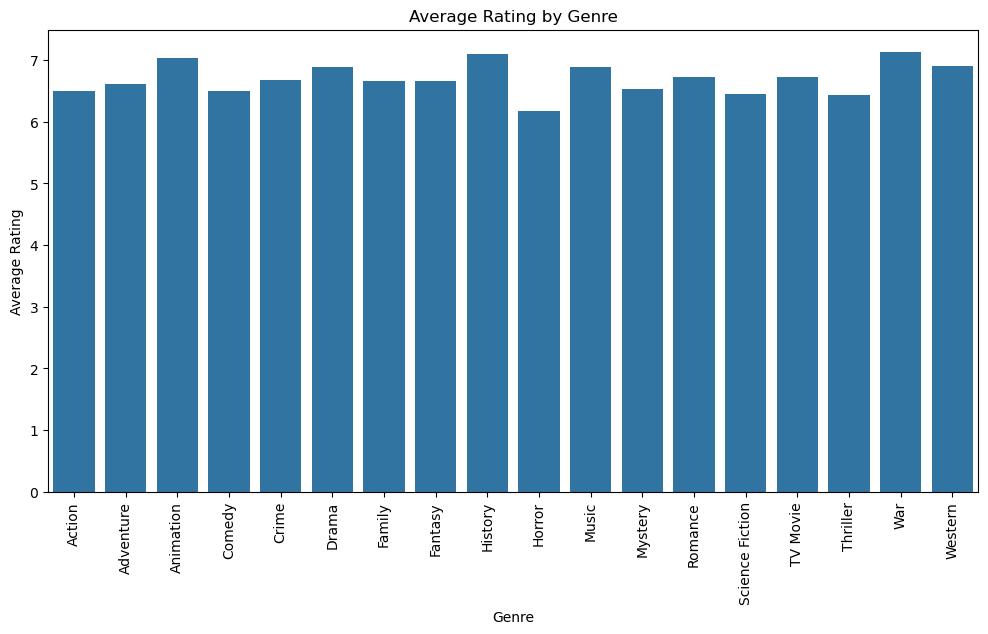

In [5]:
# Convert genre_ids to Genres, and calculate the average score for each type
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a new column that stores each type for each movie
genre_ratings = df.explode('Genres').groupby('Genres')['vote_average'].mean()
genre_popularity = df.explode('Genres').groupby('Genres')['popularity'].mean()

# Plot the relationship between type and rating
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

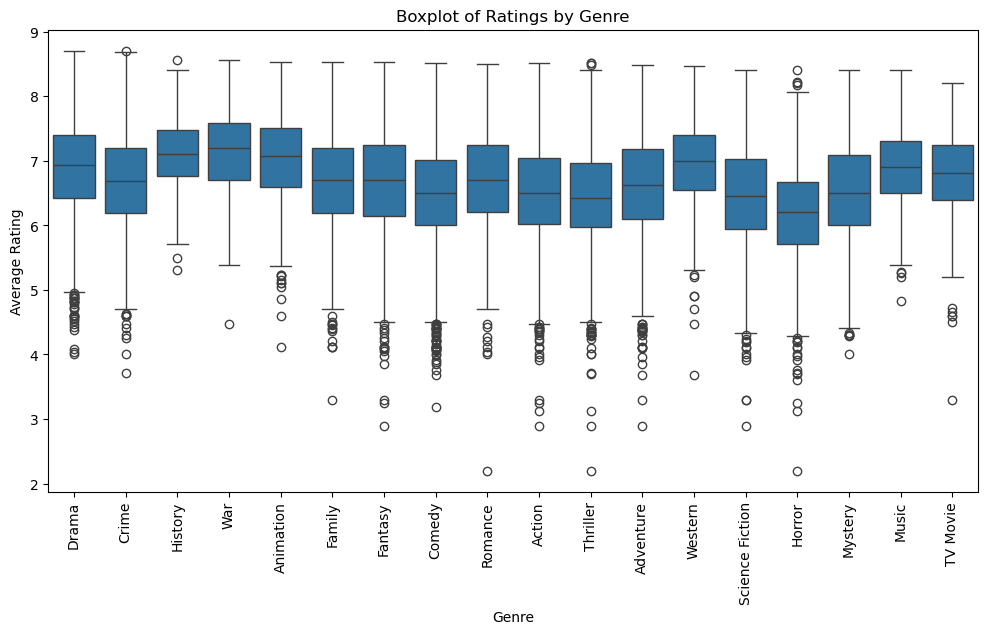

In [12]:
# 绘制类型评分的箱型图
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.explode('Genres'), x='Genres', y='vote_average')
plt.title('Boxplot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

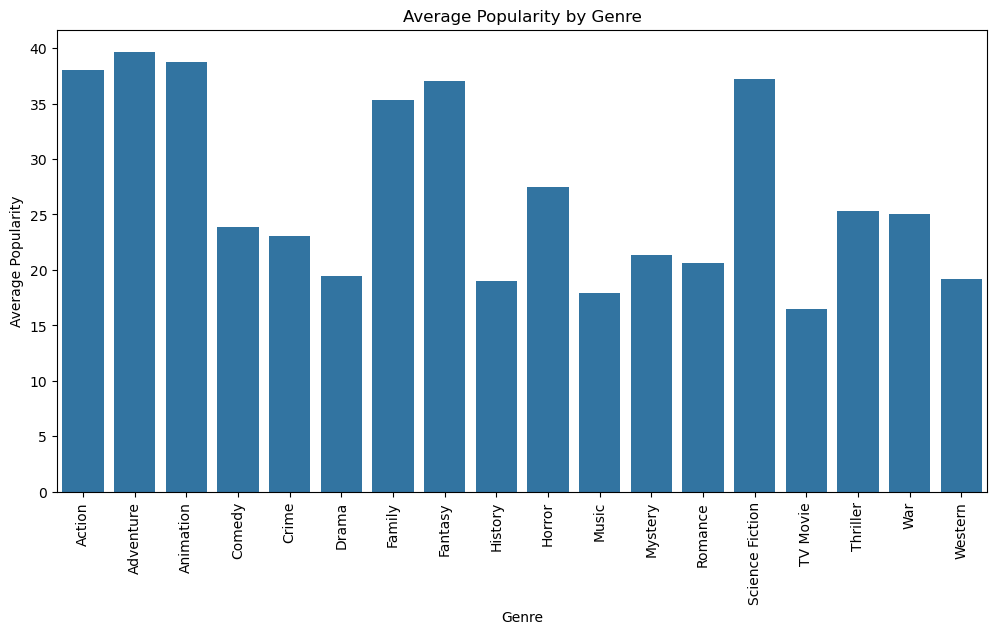

In [6]:
# Plot the relationship between type and popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

### <font color=blue> Analysis 05
#### In this step, we visualized the data based on the newly synthesized dataframe. They concluded that <font color=purple> "films with higher average ratings are generally more popular"</font>.



## <font color=orange> Task5:Temporal Analysis
### <font color=red> Code 06

In [7]:
# Trends in ratings and popularity over years
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
yearly_ratings = df.groupby('release_year')['vote_average'].mean()
yearly_popularity = df.groupby('release_year')['popularity'].mean()

# Print results
print(yearly_ratings)
print(yearly_popularity)

release_year
1902    7.919000
1903    7.000000
1915    6.030000
1916    7.081000
1918    7.300000
          ...   
2020    6.679186
2021    6.822403
2022    6.817432
2023    6.905922
2024    6.754358
Name: vote_average, Length: 110, dtype: float64
release_year
1902     12.065000
1903      7.767000
1915     10.808000
1916      7.869000
1918      5.188000
           ...    
2020     17.975848
2021     27.813003
2022     34.685953
2023     65.091060
2024    347.780235
Name: popularity, Length: 110, dtype: float64


### <font color=blue> Analysis 06
#### In this step, we calculated the average rating and popularity of each released film for each year and made dataframes.




### <font color=red> Code 07

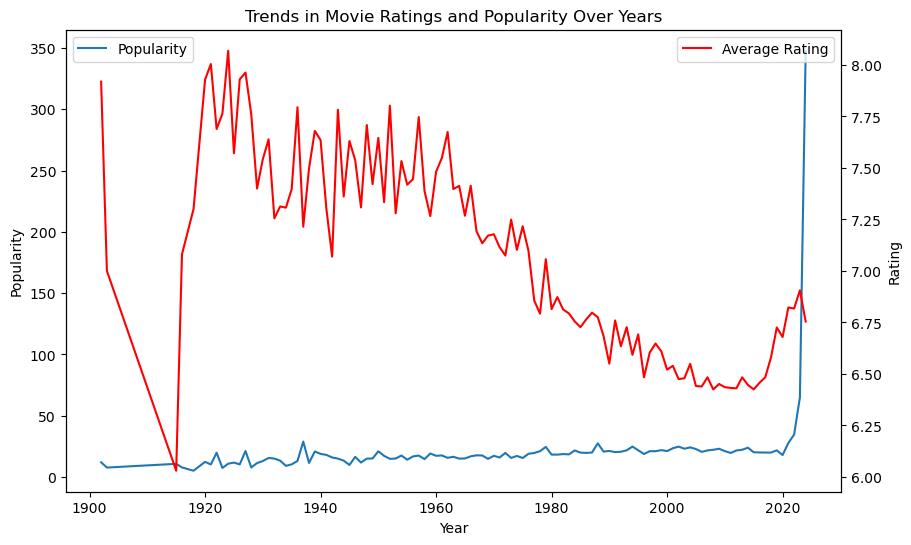

In [8]:
# Data visualization
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=yearly_popularity, label='Popularity')
plt.title('Trends in Movie Ratings and Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
ax2 = ax1.twinx()
sns.lineplot(data=yearly_ratings, label='Average Rating', color='red')
ax2.set_ylabel('Rating')
ax2.tick_params(axis='y')
ax2.set_ylim(ax2.get_ylim()[0], ax2.get_ylim()[1])
plt.legend()
plt.show()

### <font color=blue> Analysis 07
#### In this step, we visualize the two dataframes we obtained in the previous step. Two conclusions were drawn.
#### 1. <font color=purple> In general, the more recent the films, the more popular they are. And there will be an explosive growth in movies after 2020.It shows that people pay more attention to movies released in recent years.
#### 2. <font color=purple> In general, older films have higher average ratings. Despite the downward trend in the overall rating, the average rating has rebounded in the past five years. It reflects people's praise for the past classics and their dissatisfaction with the quality of recent films.




## <font color=orange> Task6:Data Visualization
### <font color=red> Code 08

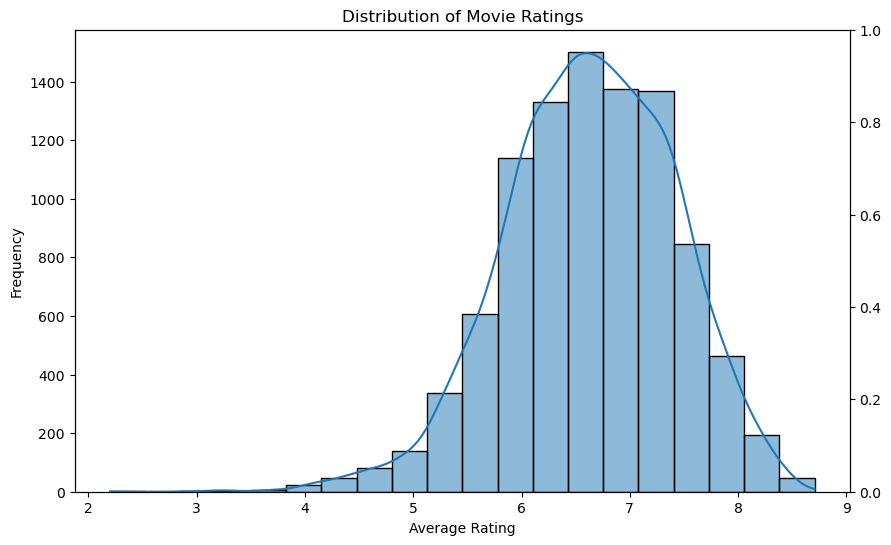

In [9]:
# Distribution of ratings
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
ax2 = ax1.twinx()

plt.show()

### <font color=blue> Analysis 08
#### In this step, we realized the data visualization of movie rating distribution and popularity. Two conclusions are drawn.
####  1. <font color=purple> The movie rating distribution presents an elliptical distribution. Most of them are between 5.5 and 7.5. This means that the average level of film production is around 6.5, with not many films either very good or very bad.
####  2. <font color=purple> The popularity of a film increases with its rating. It also shows that rating is powerful in judging whether a film is an excellent film recognized by the public.


### <font color=red> Code 09

In [ ]:
# Extract movie genre combinations and calculate the average ratings for these combinations
def get_genre_combinations(genre_ids):
    # Gets all possible combinations of types (regardless of order)
    return list(combinations(sorted(genre_ids), 2))  # can set the combination size to 2

# Get genre combinations for all movies
genre_combinations = df['genre_ids'].apply(get_genre_combinations)

# Expand genre combinations for all movies
genre_pairs = [pair for sublist in genre_combinations for pair in sublist]

# Create a DataFrame to hold the score for each pair of type combinations
genre_pairs_df = pd.DataFrame(genre_pairs, columns=['genre_1', 'genre_2'])

# Combine scoring information
genre_pairs_df['avg_rating'] = genre_pairs_df.apply(lambda row: df[(df['genre_ids'].apply(lambda x: row['genre_1'] in x and row['genre_2'] in x))]['vote_average'].mean(), axis=1)

# Average scores are calculated by type combination
genre_pairs_avg_rating = genre_pairs_df.groupby(['genre_1', 'genre_2'])['avg_rating'].mean().reset_index()

# Create a network diagram.
G = nx.Graph()

# Adds nodes and edges to the graph
genre_df = pd.read_csv('Genre_and_Genre_ID_Mapping.csv')  # Assuming you have a CSV with genre IDs and names
# Create a dictionary to map genre IDs to genre names
genre_dict = pd.Series(genre_df['Genre'].values, index=genre_df['GenreID']).to_dict()
for _, row in genre_pairs_avg_rating.iterrows():
    row['genre_1'] = genre_dict[row['genre_1']]
    row['genre_2'] = genre_dict[row['genre_2']]
    G.add_edge(row['genre_1'], row['genre_2'], weight=row['avg_rating'])

# graphing
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=20)  # distribution
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Draw Border
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, alpha=0.6, edge_color=weights, edge_cmap=plt.cm.Blues)

# Plot node
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', alpha=0.7)

# Draw label
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Set title
plt.title('Network of Genre Combinations and their Average Ratings')
plt.axis('off')
plt.show()







#图另外发了

### <font color=blue> Analysis 09
#### In this step, we draw a network diagram that shows the strong correlation and fit between the various movie genres.



## <font color=orange> Task7:Recommendation System Basics
### <font color=red> Code 10

In [11]:
# Adds nodes and edges to the graph
genre_df = pd.read_csv('Genre_and_Genre_ID_Mapping.csv')  # Assuming you have a CSV with genre IDs and names
# Create a dictionary to map genre IDs to genre names
genre_dict = pd.Series(genre_df['Genre'].values, index=genre_df['GenreID']).to_dict()
def recommend_movies(n=10):
    return df.nlargest(n, 'vote_average')[['title', 'vote_average']]

print(genre_dict)
# Map genre IDs to names



favorite_input = input("Enter your favorite movies, genres, or years separated by commas: ").split(',')

def recommend_based_on_favorites(favorite_input, n=10):
    favorite_genres = [genre for genre in favorite_input if genre in genre_dict.values()]
    favorite_years = [int(item) for item in favorite_input if item.isdigit()]
    favorite_titles = [item for item in favorite_input if not item.isdigit() and item not in favorite_genres]
    
    recommended_movies = df[
        df['genre_names'].apply(lambda x: any(genre in x for genre in favorite_genres)) |
        df['release_year'].isin(favorite_years) |
        df['title'].isin(favorite_titles)
    ]
    
    return recommended_movies.nlargest(n, 'vote_average')[['title', 'vote_average']]

# Example usage

# Convert 'genre_ids' to 'genre_names'
df['genre_names'] = df['genre_ids'].apply(lambda x: [genre_dict.get(int(genre_id), 'Unknown') for genre_id in ast.literal_eval(x)])

# Example usage
print(recommend_based_on_favorites(favorite_input, 10))
print(recommend_movies(10))

{18: 'Drama', 80: 'Crime', 36: 'History', 10752: 'War', 16: 'Animation', 10751: 'Family', 14: 'Fantasy', 35: 'Comedy', 10749: 'Romance', 28: 'Action', 53: 'Thriller', 12: 'Adventure', 37: 'Western', 878: 'Science Fiction', 27: 'Horror', 9648: 'Mystery', 10402: 'Music', 10770: 'TV Movie'}


Enter your favorite movies, genres, or years separated by commas:  Family


                                        title  vote_average
5                               Spirited Away         8.537
14                          Impossible Things         8.500
56                         Once Upon a Studio         8.332
74                      It's a Wonderful Life         8.277
82   The Boy, the Mole, the Fox and the Horse         8.262
87                              The Lion King         8.257
98                              Wolf Children         8.228
100              Puss in Boots: The Last Wish         8.227
101                               Wolfwalkers         8.222
110                                      Coco         8.213
                         title  vote_average
0     The Shawshank Redemption         8.706
1                The Godfather         8.690
2        The Godfather Part II         8.575
3             Schindler's List         8.565
4                 12 Angry Men         8.546
5                Spirited Away         8.537
7              The Dark K

### <font color=blue> Analysis 10
#### In this step, we can analyze preferences by genre name, release year and title, and finally make recommendations based on ratings and popularity.